# Lab 2: Taylor Polynomial 

**Gavela Maculuve**

### Imports

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [65]:
# Taylor series function 
def taylor_series(f,x,a,n):
    '''
    Compute the Taylor Polynomial of order n for the function f around the point a.

    Args:
        f: sympy expression
        x: sympy symbol
        a: point of expansion
        n: order of the series
    
    Returns:
        sympy expression: Taylor Polynomial of degree n centered at a.
    '''
    poly = 0
    for i in range(n+1):
        di = sp.diff(f,x,i).subs(x,a)
        poly += di * (x-a)**i / sp.factorial(i)
    return sp.simplify(poly)
# I will be using this function throughout this project

In [66]:
x = sp.Symbol('x') # symbol

## Exercise 1

Plot the Taylor approximation of $\frac{1}{3x-x^2}$ of degree $4$ centered at $1$, for $x$ in $[1,3]$

In [69]:
# Defining Variables (function, center, degree)
f_exp1 = 1/(3*x-x**2)
a_1 = 1
n_1 = 4

In [70]:
# Computing Taylor  Polynomial
taylor_poly_1 = taylor_series(f_exp1,x,a_1,n_1)

# Convert symbolic expressions to numerical functions
f_np_1 = sp.lambdify(x, f_exp1, 'numpy')
taylor_np_1 = sp.lambdify(x, taylor_poly_1, 'numpy')

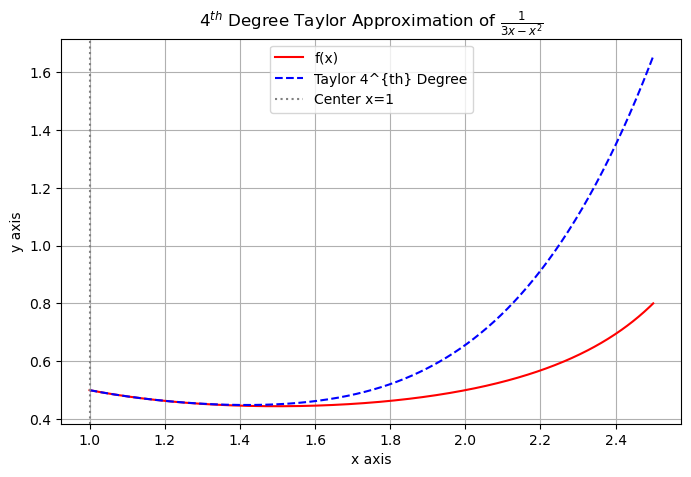

P4(x) = 11*x**4/32 - 27*x**3/16 + 27*x**2/8 - 53*x/16 + 57/32


In [72]:
# X values from 1 to 2.5
xvals = np.linspace(1,2.5,500)
y = f_np_1(xvals)
y_t = taylor_np_1(xvals)

# plotting the graph
plt.figure(figsize=(8,5))
plt.title(r"$4^{th}$ Degree Taylor Approximation of $\frac{1}{3x-x^2}$")

plt.plot(xvals, y, label="f(x)", color="red")
plt.plot(xvals, y_t, color="blue", label=r"Taylor 4^{th} Degree", linestyle = "--")
plt.axvline(a_1, color='gray', linestyle=':', label='Center x=1')

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.grid()
plt.show()
print("P4(x) =", taylor_poly_1)

## Exercise 2

Plot the Taylor approximation of $\frac{1}{1-x}$ of degree $4$ centered at 0, for $x$ in $[-0.5,0.5]$

In [73]:
# Defining Variables (function, center, degree)
f_exp_2 = 1/(1-x)
a_2 = 0
n_2 = 4

In [74]:
# Computing Taylor Polynomial
taylor_poly_2 = taylor_series(f_exp_2,x,a_2,n_2)

# Convert symbolic expressions to numerical functions
f_np_2 = sp.lambdify(x, f_exp_2, 'numpy')
taylor_np_2 = sp.lambdify(x, taylor_poly_2, 'numpy')

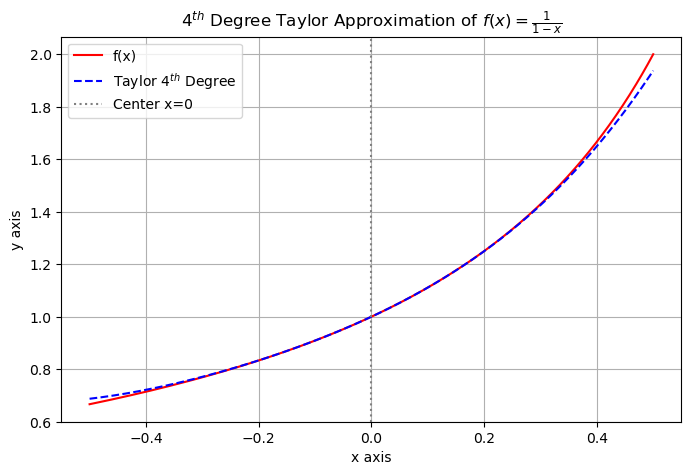

P4(x) = x**4 + x**3 + x**2 + x + 1


In [77]:
# X values from -0.5 to 0.5.
xvals = np.linspace(-0.5,0.5,500)
y = f_np_2(xvals)
y_t = taylor_np_2(xvals)

# plotting the graph
plt.figure(figsize=(8,5))
plt.title(r'$4^{th}$ Degree Taylor Approximation of $ f(x) = \frac{1}{1-x}$')

plt.plot(xvals, y, label="f(x)", color="red")
plt.plot(xvals, y_t, color="blue", label=r"Taylor $4^{th}$ Degree", linestyle = "--")
plt.axvline(a_2, color='gray', linestyle=':', label='Center x=0')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.grid()
plt.show()

print("P4(x) =", taylor_poly_2)

## Exercise 3

1. Find and plot on the $x-$ interval $[\pi,3.3]$:

   $\ln(1+2(x - \pi))$,

   $P_1(x)$, $P_2(x)$, $P_3(x),  P_4(x)$;

Where the Taylor polynomials are centered at $\pi$.

In [78]:
# Defining Variables (function, center)
f_exp3 = sp.log(1+2*(x-sp.pi))
a_3 = sp.pi

In [79]:
# Computing P1-P4 with a dictionary, to make it more efficient.
P = {}
for deg in range(1,5):
    P[deg] = taylor_series(f_exp3,x,a_3,deg)

# Convert symbolic expressions to numerical functions
f_np_3 = sp.lambdify(x, f_exp3, 'numpy')
P_num = {}
for deg in range(1, 5):
    P_num[deg] = sp.lambdify(x, P[deg], 'numpy')

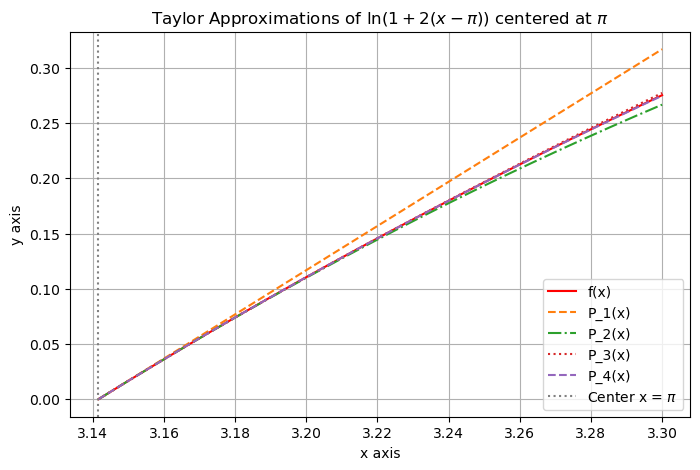

P1(x) = 2*x - 2*pi
P2(x) = 2*x - 2*(x - pi)**2 - 2*pi
P3(x) = 2*x + 8*(x - pi)**3/3 - 2*(x - pi)**2 - 2*pi
P4(x) = 2*x - 4*(x - pi)**4 + 8*(x - pi)**3/3 - 2*(x - pi)**2 - 2*pi


In [83]:
# X values from pi to 3.3.
xvals = np.linspace(np.pi, 3.3, 500)

y = f_np_3(xvals)
p_vals = {deg: P_num[deg](xvals) for deg in P}

# plotting the graphs
plt.figure(figsize=(8,5))
plt.title(r"Taylor Approximations of $\ln(1 + 2(x - \pi))$ centered at $\pi$")
plt.plot(xvals, y, label="f(x)", color="red")

colors = ['C1', 'C2', 'C3', 'C4']
lines = ['--', '-.',':','--']
for i, deg in enumerate(sorted(p_vals.keys())):
    plt.plot(xvals, p_vals[deg], label=f"P_{deg}(x)", color=colors[i], linestyle =lines[i], linewidth = 1.5)
plt.axvline(a_3, color='gray', linestyle=':', label=r'Center x = $\pi$')

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.grid()
plt.show()

for deg in range(1,5):
    print(f"P{deg}(x) =", (P[deg]))

2. Which one is more accurate when you get close to $\pi$? What happens when you get away from $\pi$?

In [55]:
x_test = 3.3
true_val = float(f_exp3.subs(x, x_test))
print(f"True f({x_test}) = {true_val}")
print("-------")

# Calculating errors
for i, p in enumerate([P[1], P[2], P[3], P[4]], start=1):
    approx = float(p.subs(x, x_test))
    print(f"P{i}({x_test}) = {approx} | Error = {abs(true_val - approx):.6f}")

True f(3.3) = 0.27521570885260843
-------
P1(3.3) = 0.3168146928204132 | Error = 0.041599
P2(3.3) = 0.2666289180269668 | Error = 0.008587
P3(3.3) = 0.27722864524372687 | Error = 0.002013
P4(3.3) = 0.27471003325210835 | Error = 0.000506


**$P_4$ is the most accurate with the least error. This is because higher-degree Taylor Polynomials include more terms from the function's more derivatives, so the closer you get to the center, the better the approximation is.
However, the accuracy decreases as we go further from $\pi$ (center of expansion), becuase Taylor Series are local approximations**

## Exercise 4
1. Find and plot on the $x-$ interval $[-1,1]$, the quadratic Taylor polynomials of $e^{-\cos(x)}$ centered at $x=0$.

In [88]:
# Defining Variables (function, center, degree)
f_exp_4 = sp.exp(-sp.cos(x))
a_4 = 0
n_4 = 2

# Computing Taylor  Polynomial
taylor_poly_4 = taylor_series(f_exp_4,x,a_4,n_4)
taylor_poly_4

(x**2 + 2)*exp(-1)/2

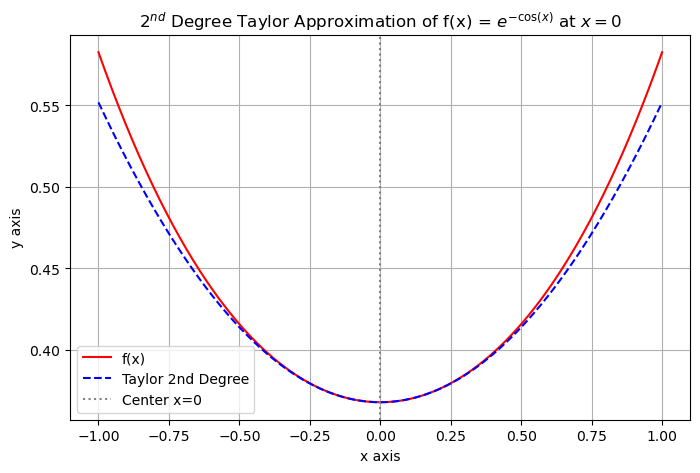

In [89]:
# Convert symbolic expressions to numerical functions
f_np_4 = sp.lambdify(x, f_exp_4, 'numpy')
taylor_np_4 = sp.lambdify(x, taylor_poly_4, 'numpy')

# X values from -1 to 1.
xvals = np.linspace(-1,1,500)

y = f_np_4(xvals)
y_t = taylor_np_4(xvals)

plt.figure(figsize=(8,5))
plt.title(r"$2^{nd}$ Degree Taylor Approximation of f(x) = $e^{-\cos(x)}$ at $x = 0$")

plt.plot(xvals, y, label="f(x)", color="red")
plt.plot(xvals, y_t, color="blue", label="Taylor 2nd Degree", linestyle = "--")
plt.axvline(a_4, color='gray', linestyle=':', label='Center x=0')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.grid()
plt.show()

2. Plot the error between the Taylor of polynomial of degree 2 for $e^{-\cos(x)}$, centered at 0. 

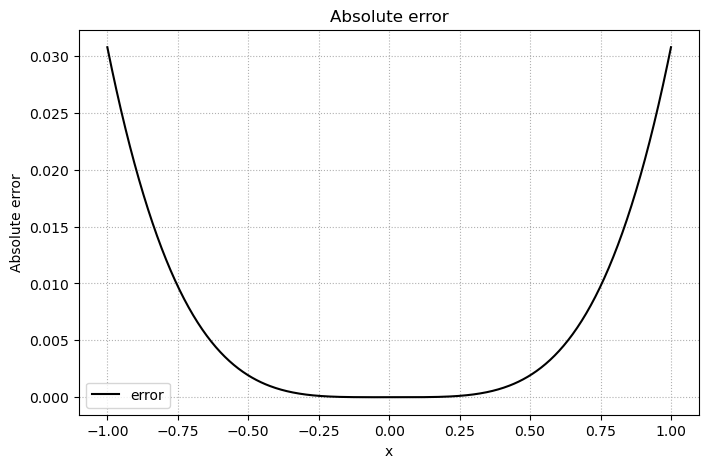

In [90]:
# Error plots
error = np.abs(y - y_t)

# plotting error
plt.figure(figsize=(8,5))
plt.plot(xvals, error, linewidth=1.5, label='error', color='black')
plt.xlabel('x')
plt.ylabel('Absolute error')
plt.title('Absolute error')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

3. Bound the error in this approximation when $-1\leq x \leq 1$. ($Error(x)=|Approximation(x) - Exact(x)|$)

In [87]:
# calculating error
max_err = np.max(np.abs(y - y_t))
print(f"Maximum |f(x) - P2(x)| on [-1,1] = {max_err:.5f}")

Maximum |f(x) - P2(x)| on [-1,1] = 0.03075


## Exercise 5
Let $f(x)=\sqrt[3]{x}$
1. Find and plot $P_3(x)$ centered at $a=1$

In [92]:
# Defining Variables (function, center, degree)
f_exp_5 = x**(1/3)
a_5 = 1
n_5 = 3

In [95]:
# Computing Taylor  Polynomial
taylor_poly_5 = taylor_series(f_exp_5,x,a_5,n_5)
print("Taylor Polynomial. Degree:",n_5, ", Centered at x =", a_5)
taylor_poly_5

Taylor Polynomial. Degree: 3 , Centered at x = 1


0.0617283950617284*x**3 - 0.296296296296296*x**2 + 0.740740740740741*x + 0.493827160493827

2. Plot $P_3(x)$ and $f(x)$ for in $x\in[0,4]$

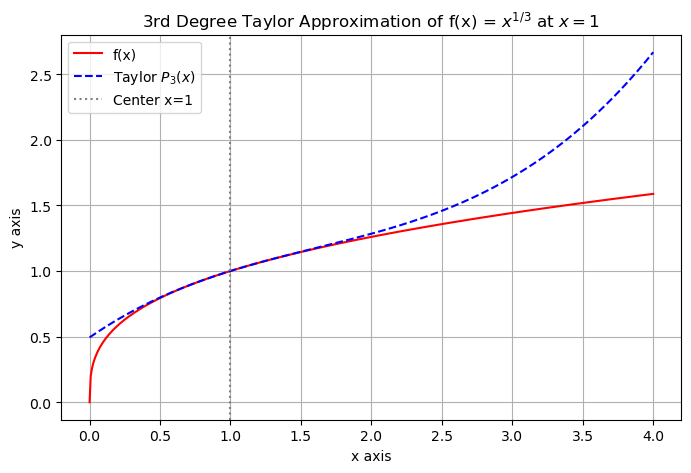

In [96]:
# Convert symbolic expressions to numerical functions
f_np_5 = sp.lambdify(x, f_exp_5, 'numpy')
taylor_np_5 = sp.lambdify(x, taylor_poly_5, 'numpy')

# X values from 0 to 4.
xvals = np.linspace(0,4,500)

y = f_np_5(xvals)
y_t = taylor_np_5(xvals)

# plotting the graph
plt.figure(figsize=(8,5))
plt.title(r"3rd Degree Taylor Approximation of f(x) = $x^{1/3}$ at $x = 1$")
plt.plot(xvals, y, label="f(x)", color="red")
plt.plot(xvals, y_t, color="blue", label=r"Taylor $P_3(x)$", linestyle = "--")
plt.axvline(a_5, color='gray', linestyle=':', label='Center x=1')

plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.grid()
plt.show()

3. Plot the error between $P_3$ and $f$

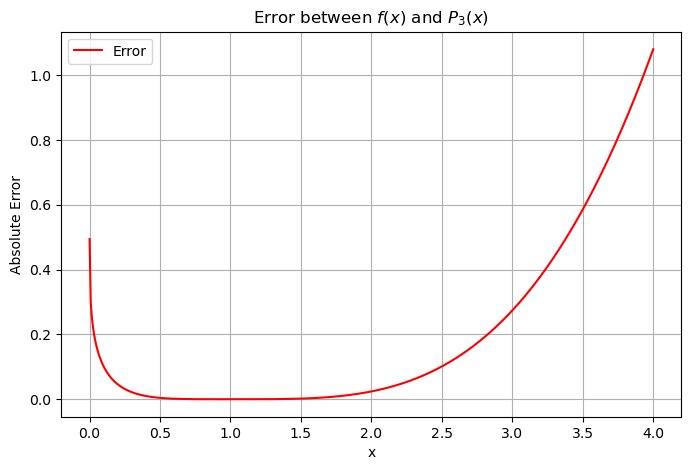

In [97]:
# error
error = np.abs(y-y_t)

plt.figure(figsize=(8,5))
plt.title(r"Error between $f(x)$ and $P_3(x)$")

plt.plot(xvals, error, label="Error", color="red")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid()
plt.show()

4. Approxmation $\sqrt[3]{2}$ and $\sqrt[3]{3}$  using $P_3$. How far off are they?

In [98]:
# true values
true_rt_2 = 2**(1/3)
true_rt_3 = 3**(1/3)

# approximated values
approx_rt_2 = taylor_poly_5.subs(x, 2).evalf()
approx_rt_3 = taylor_poly_5.subs(x, 3).evalf()

# error
error_2 = abs(true_rt_2 - approx_rt_2)
error_3 = abs(true_rt_3 - approx_rt_3)

print(f'P3(2) = {approx_rt_2:.6f}, true = {true_rt_2:.6f}. \n These values are far by = {error_2:.6f}') 
print(f'\nP3(3) = {approx_rt_3:.6f}, true = {true_rt_3:.6f}. \n These values are far by = {error_3:.6f}')


P3(2) = 1.283951, true = 1.259921. 
 These values are far by = 0.024030

P3(3) = 1.716049, true = 1.442250. 
 These values are far by = 0.273800


## Exercise 6
A well known approximation, when $x$ is small, is $\cos(x)\simeq 1 - \frac{x^2}{2}$. 
1. Bound the error of the approximation of $\sin(x)$ by $x$ for $\frac{-\pi}{4}\leq x \leq \frac{\pi}{4}$ using the plot. This means the maximum of $|\cos(x)-(1-\frac{x^2}{2})|$ when $x$ is $\frac{-\pi}{4}\leq x \leq \frac{\pi}{4}$.

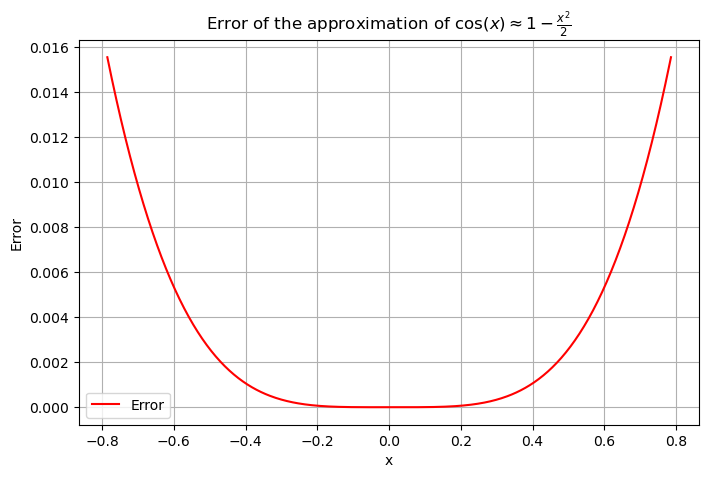

In [99]:
# X values from -pi/4 to pi/4
xvals = np.linspace(-np.pi/4, np.pi/4, 500)

# Exact and approximate cosine values
cos_exact = np.cos(xvals)
cos_approx = 1 - (xvals**2)/2

# absolute error
error = np.abs(cos_exact-cos_approx)

# plotting error
plt.figure(figsize=(8,5))
plt.title(r"Error of the approximation of $\cos(x) \approx 1 - \frac{x^2}{2}$")
plt.plot(xvals, error, label="Error", color="red")

plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.grid()
plt.show()

2. Bound the error using the formula.

In [100]:
max_error = np.max(abs(error))
print(f"Maximum Error |E(x)| ≈ {max_error:.12f}")

R_2 = (np.pi/4)**4 / 24
print(f"|R_2| ≤ f(x) - P2(x)| ≈ {R_2:.12f}")

Maximum Error |E(x)| ≈ 0.015531918721
|R_2| ≤ f(x) - P2(x)| ≈ 0.015854344244


In [101]:
print(abs(max_error-R_2))

0.0003224255232254884


3. Compare.

**The numerical maximum error is slightly less than the formula bound; there is a 0.0003 difference between them. I believe this is because the bound is designed to be the worst-case guarantee, as the function doesn't always reach the maximum, so the actual error is minor.**

## Exercise 7

The function $g(x)=\frac{e^x-1}{x}$ is undefined at $x=0$. By using the Taylor polynomial of $e^x$ of degree 1, 2, and 3, determine the natural definition of $g(x)$ (it means the limit of $g(x)$ as $x$ goes to $0$).

$g(x) = \frac{e^x - 1}{x}$

### Calculating $P_{1-3}$ for g(x)
$P_1(e^x) = 1 + x$

$P_2(e^x) = 1 + x + \frac{x^2}{2!}$

$P_3(e^x) = 1 + x + \frac{x^2}{2!} +  \frac{x^3}{3!}$

### Calculating the limit using Pn
$g_1(x) = \frac{P_1(e^x) - 1}{x} = \frac{1 + x - 1}{x} = \frac{x}{x} = 1$
$$\text{As } x \to 0, \quad g_1(x) \to 1$$

$g_2(x) = \frac{P_2(e^x) - 1}{x} = \frac{1 + x + \frac{x^2}{2} -1 }{x} = \frac{x}{x} + \frac{x}{2} = 1$
$$\text{As } x \to 0, \quad g_2(x) \to 1$$

$g_3(x) = \frac{P_3(e^x) - 1}{x} = \frac{1 + x + \frac{x^2}{2} + \frac{x^3}{6} -1 }{x} = \frac{x}{x} + \frac{x}{2} + \frac{x^2}{6} = 1$
$$\text{As } x \to 0, \quad g_3(x) \to 1$$

$\lim_{x \to 0} \frac{e^x - 1}{x} = \lim_{x \to 0} \frac{(e^x)'}{(x)'} =  \lim_{x \to 0} e^x = 1$

**Therefore, the natural definition of g(0) is 1.**


## Bonus 
Using the Taylor approximation of degree 3, approximate $\int_0^\pi e^{\cos(x)}dx$.

In [102]:
# Defining Variables (function, center)
f_exp_6 = sp.exp(sp.cos(x))
a = 0

In [103]:
# Taylor polynomial of degree 3
P3 = taylor_series(f_exp_6, x, a, 3)
P3

E*(2 - x**2)/2

In [104]:
# integrating both the func and the approx
i_approx = sp.integrate(P3, (x, 0, sp.pi))
i_true = sp.integrate(f_exp_6, (x, 0, sp.pi))

In [105]:
# numerical evaluation
i_approx_eval = float(i_approx.evalf())
i_true_eval = float(i_true.evalf())
error = abs(i_true_eval - i_approx_eval)

In [106]:
print(f"\nApproximation (Taylor degree 3) = {i_approx_eval:.6f}")
print(f"True Integral = {i_true_eval:.6f}")
print(f"Error = {error:.6f}")


Approximation (Taylor degree 3) = -5.507566
True Integral = 3.977463
Error = 9.485029


The Error is too big, so decided to try to compute it with $\pi$ as my center value

In [107]:
b = sp.pi

In [108]:
# repeating the process but now with it is centered at  a = pi
P3 = taylor_series(f_exp_6, x, b, 3)
i_approx = sp.integrate(P3, (x, 0, sp.pi))
i_approx_eval = float(i_approx.evalf())
i_true_eval = float(i_true.evalf())
error = abs(i_true_eval - i_approx_eval)

In [109]:
print(f"\nApproximation (Taylor degree 3) = {i_approx_eval:.6f}")
print(f"True Integral = {i_true_eval:.6f}")
print(f"Error = {error:.6f}")


Approximation (Taylor degree 3) = 3.056823
True Integral = 3.977463
Error = 0.920641


**By shifting the expansion center to pi, the polynomial better matches the function over this interval.**